<a href="https://colab.research.google.com/github/indrezabi/Python-Logistic-regression-analysis/blob/main/M4S1P12_Python_(Logistic_regression_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python for Data Analytics**


---
**M4S1P12 Graded Task: Logistic Regression Analysis**


For this graded task, I chose to implement Logistic Regression using Python.

**TASK**  :
create a logistic regression model to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

# 1. Imports

**Importing libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

**Importing data:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Turing College/Python/Graded task.xlsx'
df = pd.read_excel(file_path, sheet_name='Heart_desease')

**File preview:**

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 2. Data Checking

**Data structure:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Data contains 4238 entries and 16 columns.

**Columns list:**

In [ ]:
print(df.columns.tolist())

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


**Unique values:**

In [ ]:
# Checking categorical columns
columns_to_check = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD', 'education']

unique_values_array = []

for column in columns_to_check:
    unique_values = np.unique(df[column].values)
    unique_values_array.append((column, unique_values))

# Print unique values for each column
for column, unique_values in unique_values_array:
    print(f"Unique values in '{column}' column:", unique_values)

Unique values in 'male' column: [0 1]
Unique values in 'currentSmoker' column: [0 1]
Unique values in 'BPMeds' column: [ 0.  1. nan]
Unique values in 'prevalentStroke' column: [0 1]
Unique values in 'prevalentHyp' column: [0 1]
Unique values in 'diabetes' column: [0 1]
Unique values in 'TenYearCHD' column: [0 1]
Unique values in 'education' column: [ 1.  2.  3.  4. nan]


As observed, the dataset comprises the following types of data:

*   *Continuous variables*: age, cigsPerDay, totChol , sysBP, diaBP, BMI, heartRate, glucose

*   *Categorical binary columns*: male, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes, TenYearCHD

*   *Ordinal categorical columns*: education

**Looking for Duplicates:**

In [ ]:
total_duplicates = df.duplicated().sum()
print("Total duplicate rows observed:", total_duplicates)

Total duplicate rows observed: 0


**Looking for Missing Values:**

In [ ]:
# Count the number of rows with missing data
rows_with_missing_data = df.isnull().any(axis=1).sum()
total_rows = len(df)
percentage_rows_with_missing_data = round((rows_with_missing_data / total_rows) * 100,2)

# Checking each column missing data
columns_to_check = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                    'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
                    'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

# Create a list to store the results
result_list = []

# Iterate over each column
for column in columns_to_check:
    missing_values = df[column].isnull().sum()
    percent_missing = round((missing_values / total_rows) * 100,2)
    result_list.append({'Column': column, 'Missing Values': missing_values, 'Percentage': percent_missing})

# Convert the list to a DataFrame
result_df = pd.DataFrame(result_list)

# Display the results
print("Number of rows with missing data:", rows_with_missing_data, "(",percentage_rows_with_missing_data,"%)")
print(result_df)

Number of rows with missing data: 582 ( 13.73 %)
             Column  Missing Values  Percentage
0              male               0        0.00
1               age               0        0.00
2         education             105        2.48
3     currentSmoker               0        0.00
4        cigsPerDay              29        0.68
5            BPMeds              53        1.25
6   prevalentStroke               0        0.00
7      prevalentHyp               0        0.00
8          diabetes               0        0.00
9           totChol              50        1.18
10            sysBP               0        0.00
11            diaBP               0        0.00
12              BMI              19        0.45
13        heartRate               1        0.02
14          glucose             388        9.16
15       TenYearCHD               0        0.00


# 3. Missing Data

**Handling Missing Data:**

As previously identified, the columns with missing data are:

*   education
*   cigsPerDay
*   BPMeds
*   totChol
*   BMI
*   heartRate
*   glucose

1. **Drop** rows with missing values in the "**education**" column because it would be inaccurate to predict a person's education level. Additionally, since the missing data constitutes less than 3% of the dataset, it is insignificant.

In [ ]:
# inplace=True modifies the DataFrame in place, meaning the changes are applied directly to the original DataFrame

df.dropna(subset=['education'], inplace=True)

2. Handle missing values in the "**cigsPerDay**", "**totChol**", "**BMI**", and "**heartRate**" columns by replacing them with the **average** of all values.


In [ ]:
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)

3. Handle missing values in the "**BPMeds**" column by replacing them with the **mode** of all values.

In [ ]:
# mode()[0] retrieves the first mode value from the mode() function's result, in case there are multiple modes

mode_BPMeds = df['BPMeds'].mode()[0]
df['BPMeds'].fillna(mode_BPMeds, inplace=True)

4. Handle missing values in the "**glucose**" variable by imputing the **median** glucose value based on diabetes status. This approach is chosen because there is a significant difference in glucose values between individuals with and without diabetes.


Median glucose levels based on diabetes status:

In [ ]:
median_glucose_by_diabetes = df.groupby('diabetes')['glucose'].median()
print(median_glucose_by_diabetes)

diabetes
0     78.0
1    144.5
Name: glucose, dtype: float64


Replacing missing data of glucose:

In [ ]:
df['glucose'] = df.apply(lambda row: median_glucose_by_diabetes[row['diabetes']] if pd.isnull(row['glucose']) else row['glucose'], axis=1)

**Checking data after cleaning:**

Missing values:

In [ ]:
remaining_missing_values = df.isnull().sum().sum()
print ('Remaining missing values:', remaining_missing_values)

Remaining missing values: 0


In [ ]:
print('Total entries after data cleaning:',len(df))

Total entries after data cleaning: 4133


# 4. Outliers

Initially, descriptive statistics were conducted to see the mean, standard deviation, minimum, and maximum values for each variable.

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,1.978950,0.494798,9.029956,0.029277,0.006049,0.311154,0.025647,236.660382,132.367046,82.872248,25.778571,75.922798,81.643116,0.151948
std,0.494745,8.561628,1.019791,0.500033,11.885621,0.168601,0.077548,0.463022,0.158100,43.909173,22.080332,11.952654,4.074360,12.048169,22.972508,0.359014
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Outliers of continuous variables were then identified by assessing each variable's mean and standard deviation. Subsequently, any value exceeding 3 standard deviations from the mean, either higher or lower, was eliminated.


In [ ]:
# Calculate mean and standard deviation for each variable
mean_values = df.mean()
std_dev_values = df.std()

# Define the number of standard deviations for outliers
num_std_dev = 3

# Calculate lower and upper bounds for outliers for each variable
lower_bounds = mean_values - num_std_dev * std_dev_values
upper_bounds = mean_values + num_std_dev * std_dev_values

# List of variables with their corresponding lower and upper bounds for outliers
variables_bounds = {
    'age': (lower_bounds['age'], upper_bounds['age']),
    'cigsPerDay': (lower_bounds['cigsPerDay'], upper_bounds['cigsPerDay']),
    'totChol': (lower_bounds['totChol'], upper_bounds['totChol']),
    'sysBP': (lower_bounds['sysBP'], upper_bounds['sysBP']),
    'diaBP': (lower_bounds['diaBP'], upper_bounds['diaBP']),
    'BMI': (lower_bounds['BMI'], upper_bounds['BMI']),
    'heartRate': (lower_bounds['heartRate'], upper_bounds['heartRate']),
    'glucose': (lower_bounds['glucose'], upper_bounds['glucose'])
}

# Creating dictionary to store the number of outliers for each variable
outliers_count = {}

# Iterate over each variable and count outliers
for variable, (lower_bound, upper_bound) in variables_bounds.items():
    outliers_count[variable] = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)][variable].count()

# Print the number of outliers for each variable
print("Number of outliers for each variable:")
for variable, count in outliers_count.items():
    print(variable + ":", count)


Number of outliers for each variable:
age: 0
cigsPerDay: 20
totChol: 24
sysBP: 48
diaBP: 41
BMI: 59
heartRate: 20
glucose: 48


In [ ]:
# Creating a combined mask with all False values
combined_mask = pd.Series(False, index=df.index)

# Iterate over each variable and update the combined mask
for variable, (lower_bound, upper_bound) in variables_bounds.items():
    mask = (df[variable] < lower_bound) | (df[variable] > upper_bound)
    combined_mask |= mask

# Delete rows containing outliers
df_cleaned = df[~combined_mask]

# Calculate percentage change in number of rows after cleaning
num_rows_original = df.shape[0]
num_rows_cleaned = df_cleaned.shape[0]
percentage_change = ((num_rows_cleaned - num_rows_original) / num_rows_original) * 100

# Display results
print("Original number of rows:", num_rows_original)
print("Number of rows after cleaning::",num_rows_cleaned)
print(f"Percentage change in number of rows: {round(percentage_change, 2)}%")

Original number of rows: 4133
Number of rows after cleaning:: 3913
Percentage change in number of rows: -5.32%


After examining the dataset before and after eliminating outliers, it was noted that approximately 5.32% of the initial data was removed. Given the insignificance of this loss, we can confidently proceed with further analysis.

# 5. Splitting the data


Our dataset was randomly split into two sections:
* training (70% of the full dataset)
* testing (30% of the full dataset)

In [ ]:
# Define independent variables (X) and target variable (y)
X = df_cleaned.drop(columns=['TenYearCHD'])
y = df_cleaned['TenYearCHD']

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Original Dataset:")
print(df_cleaned['TenYearCHD'].value_counts(normalize=True) * 100)

print("\nTraining Dataset:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTesting Dataset:")
print(y_test.value_counts(normalize=True) * 100)

Original Dataset:
TenYearCHD
0    85.969844
1    14.030156
Name: proportion, dtype: float64

Training Dataset:
TenYearCHD
0    85.542169
1    14.457831
Name: proportion, dtype: float64

Testing Dataset:
TenYearCHD
0    86.967632
1    13.032368
Name: proportion, dtype: float64


As we can notice from tables above, the ratio between sick and healthy people is very similar, indicating that the division is good.


# 6. Correlation and Multicollinearity Analysis

**Correlation with target variable TenYearCHD:**

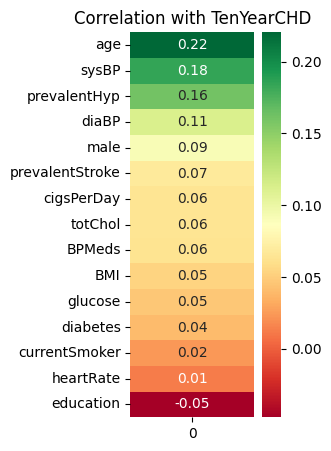

In [ ]:
# Calculate the correlation coefficients between each feature and the target variable
target_corr = df_cleaned.drop(columns=['TenYearCHD']).corrwith(df_cleaned['TenYearCHD'])

# Sort the correlation coefficients in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Plot the horizontal heatmap
plt.figure(figsize=(2, 5))
sns.heatmap(target_corr_sorted.to_frame(), cmap="RdYlGn", annot=True, fmt='.2f')
plt.title("Correlation with TenYearCHD")
plt.show()

We can notice that **age, sysBP, prevalentHyp, diaBP, male, prevalentStroke** have some level of correlation with our target variable.

**Correlation matrix:**

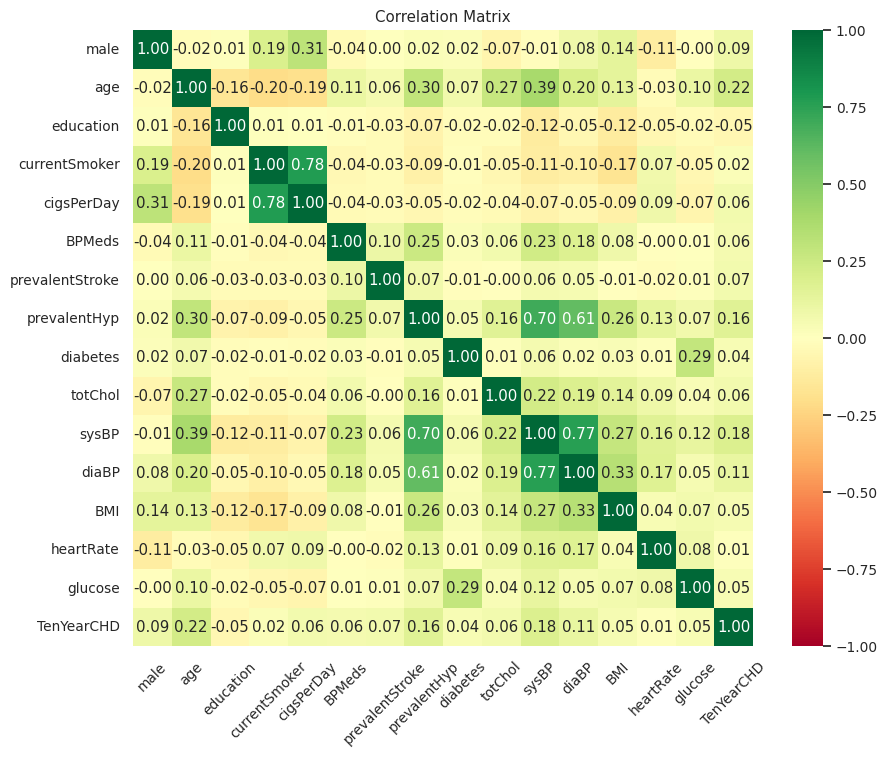

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.9)
sns.heatmap(correlation_matrix, cmap="RdYlGn", annot=True, fmt=".2f", vmin=-1, vmax=1, center=0)
plt.xticks(rotation=45)
plt.title("Correlation Matrix")
plt.show()

The correlation analysis revealed certain high-correlated factors. The **highest correlation** exists between the **"cigsPerDay" and "currentSmoker"** variables and the variables **"sysBP" and "diaBP"**. Seeking to prevent multicollinearity, we can't use both columns of those pairs; i.e., one column of those pairs should be eliminated in the final model.

Next, each plot in the grid represents the **relationship between two variables** for visual inspection:

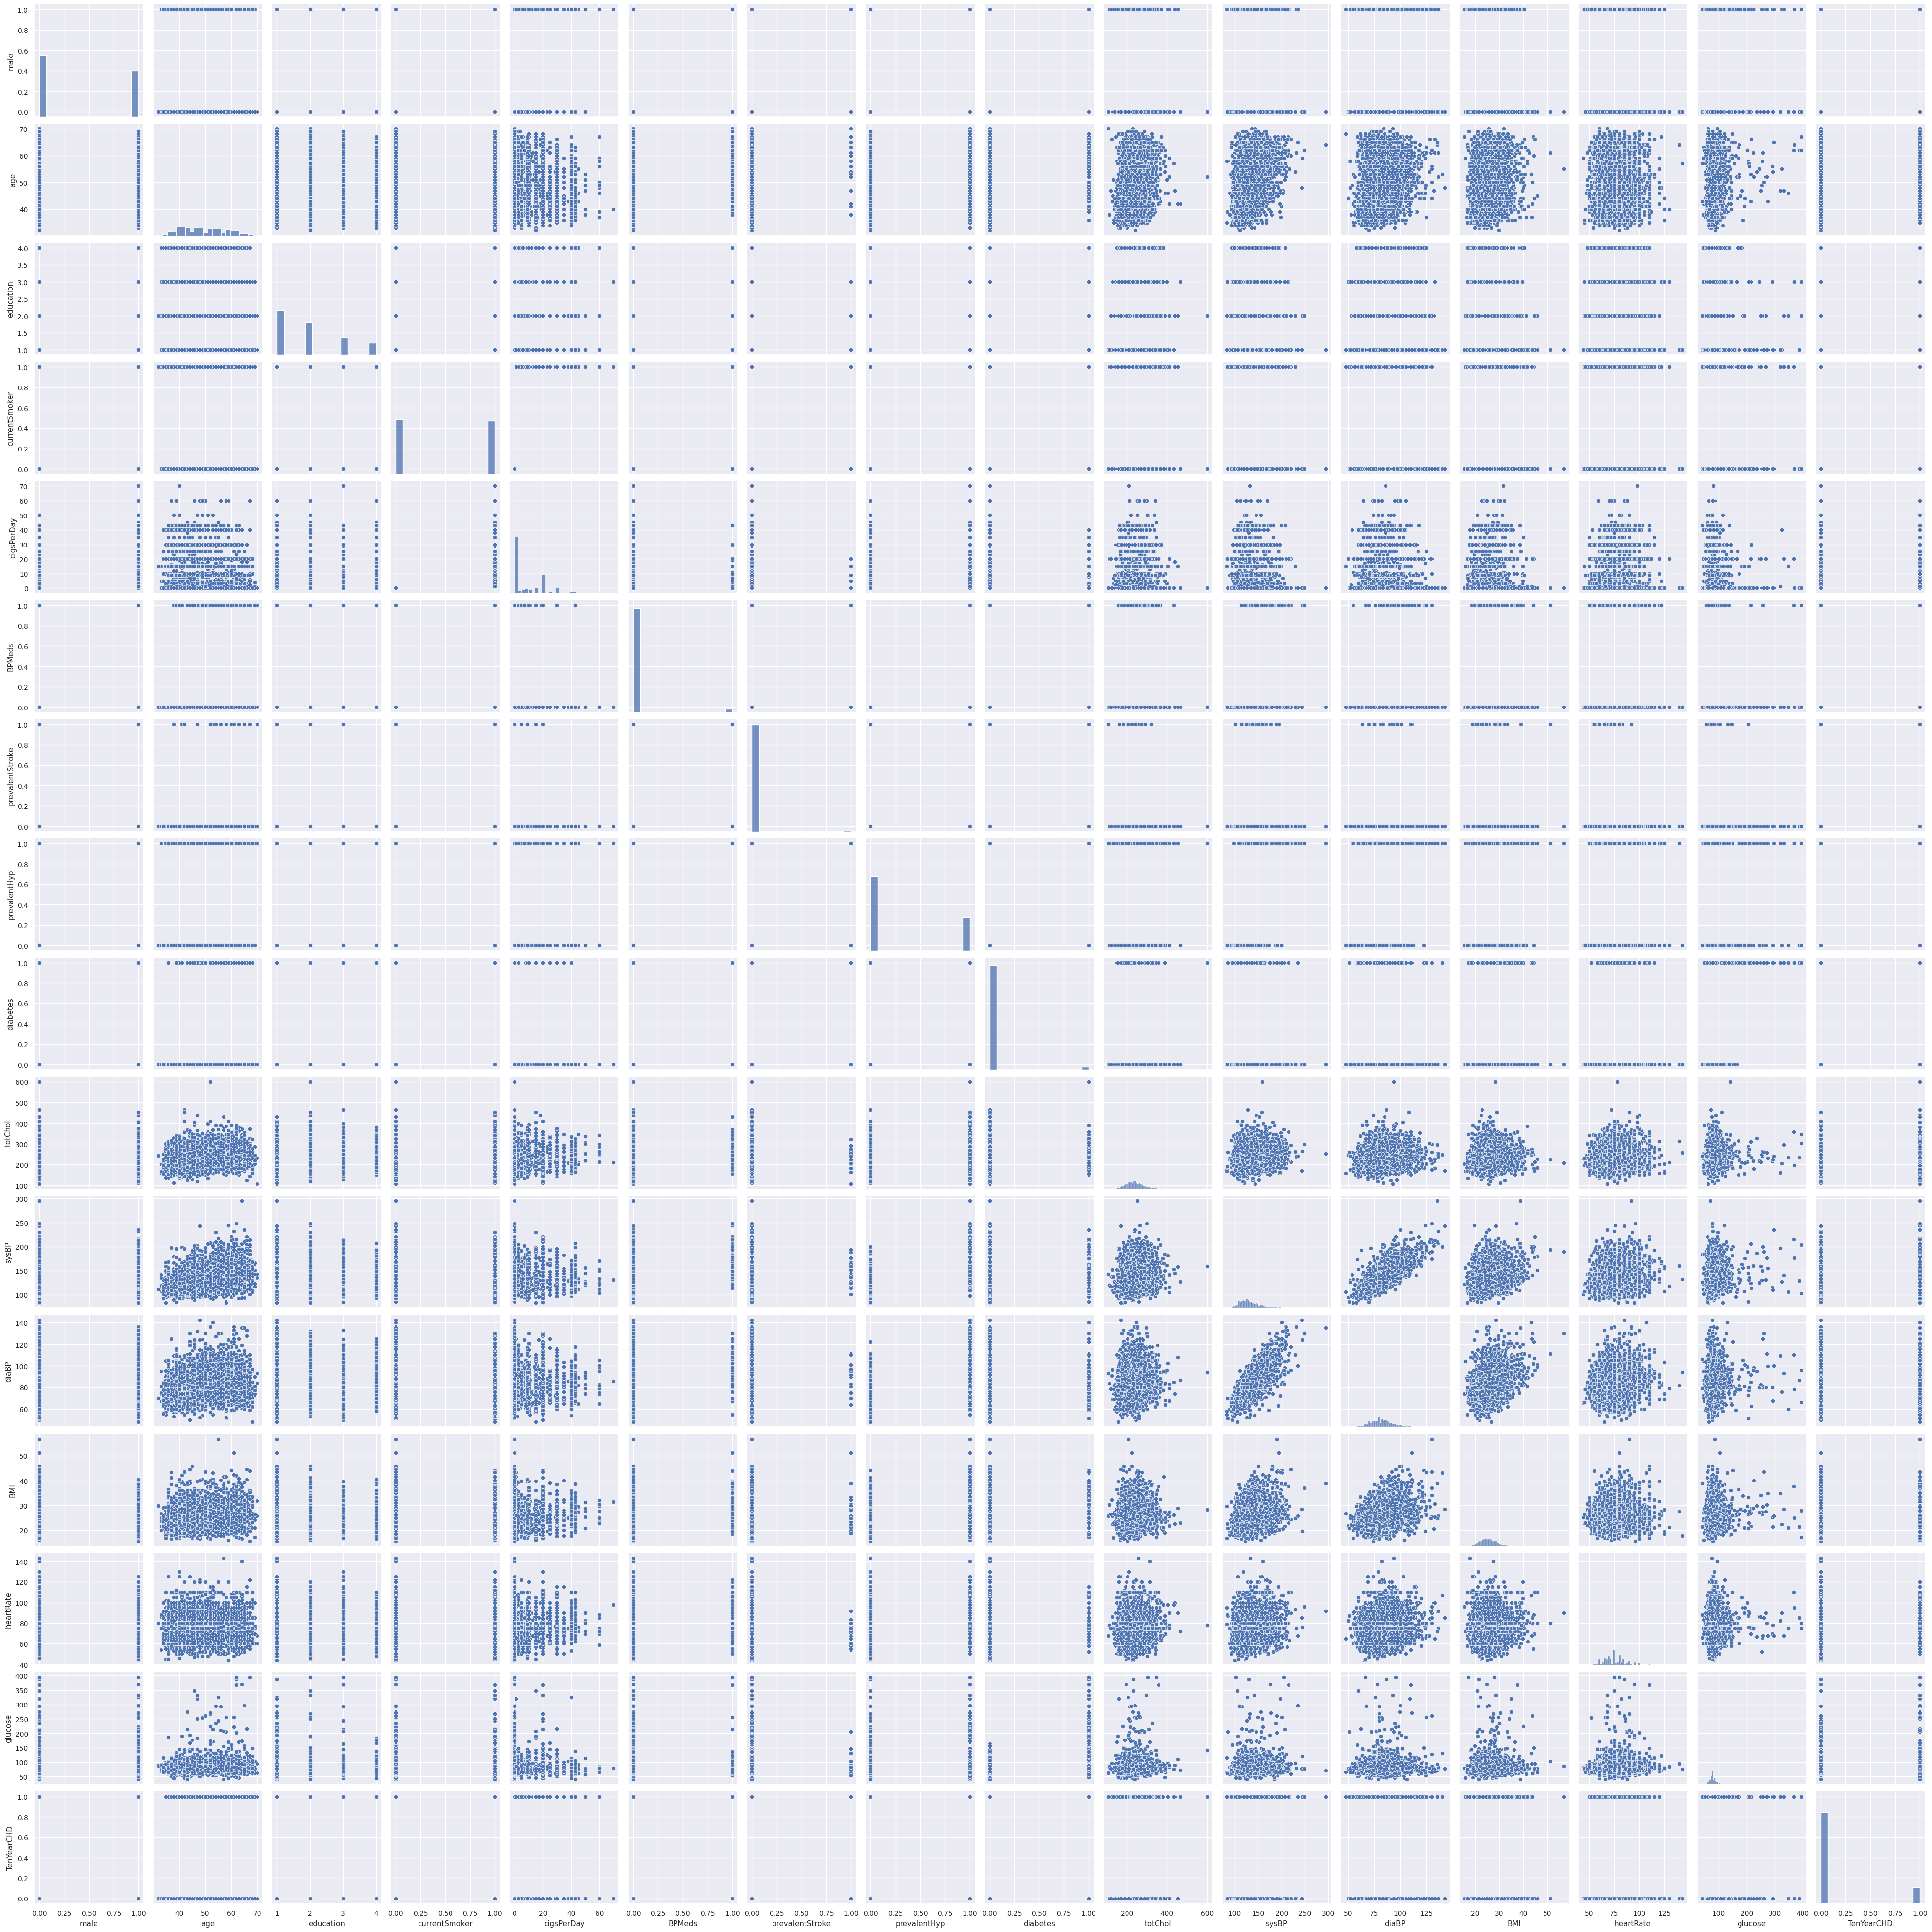

In [ ]:
sns.pairplot(data=df)

# 7. First model training

First of all, we run **logistic regression** from the train data.
The first model (below) was created as a base version to compare it with more advanced future models. It incorporates all variables available in the dataset.

In [ ]:
# Add a constant column (for intercept purpose) to the independent variables (X_train)
X_with_const = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_with_const)
logit_result = logit_model.fit()

# Get the AIC value
aic = round((logit_result.aic),2)

# Print the summary of the model results
print(logit_result.summary())
print("AIC:", aic)

Optimization terminated successfully.
         Current function value: 0.372608
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2739
Model:                          Logit   Df Residuals:                     2723
Method:                           MLE   Df Model:                           15
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                 0.09821
Time:                        12:15:32   Log-Likelihood:                -1020.6
converged:                       True   LL-Null:                       -1131.7
Covariance Type:            nonrobust   LLR p-value:                 6.042e-39
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.1216      0.918     -7.758      0.000      -8.921      -5.322
male          

The variables **male, age, cigsPerDay,** and **sysBP** have **p-values < 0.05**. This indicates that only these values are statistically significant. Despite this fact, we proceed further using the stepwise method.

# 8. Stepwise method

In the stepwise method (specifically - backward elimination), an initial regression model is built using all available attributes from the dataset. Then, iteratively, the attribute with the highest p-value is removed from the model until all remaining attributes have p-values below the chosen significance level, typically 0.05. This process aims to streamline the model by retaining only the most statistically significant attributes, enhancing its interpretability and predictive power.








In [ ]:
# Function for backward elimination
def backward_elimination(X_train, y_train, threshold=0.05):
    # Add a constant column to the features
    X_with_const = sm.add_constant(X_train)

    # Fit the logistic regression model
    logit_model = sm.Logit(y_train, X_with_const)
    logit_result = logit_model.fit()

    # Iteratively remove attributes with high p-values
    while True:
        # Find the attribute with the highest p-value
        max_p_value = logit_result.pvalues.drop('const').max()

        # If the highest p-value is above the threshold, remove the corresponding attribute
        if max_p_value > threshold:
            max_p_index = logit_result.pvalues.drop('const').idxmax()
            X_train = X_train.drop(max_p_index, axis=1)
            print(f"\nRemoving '{max_p_index}' (p-value: {max_p_value})")
            X_with_const = sm.add_constant(X_train)
            logit_model = sm.Logit(y_train, X_with_const)
            logit_result = logit_model.fit()
        else:
            break

    return logit_result

# Call the backward elimination function
final_logit_result = backward_elimination(X_train, y_train)

# Get the AIC value
aic = round((final_logit_result.aic),2)

# Print the final summary of the model results
print("\nFinal Model Summary:")
print(final_logit_result.summary())
print("AIC:", aic)


Optimization terminated successfully.
         Current function value: 0.372608
         Iterations 7

Removing 'heartRate' (p-value: 0.9812476189194799)
Optimization terminated successfully.
         Current function value: 0.372609
         Iterations 7

Removing 'glucose' (p-value: 0.6537349403958503)
Optimization terminated successfully.
         Current function value: 0.372645
         Iterations 7

Removing 'education' (p-value: 0.6121774886250423)
Optimization terminated successfully.
         Current function value: 0.372692
         Iterations 7

Removing 'BPMeds' (p-value: 0.4709232246908567)
Optimization terminated successfully.
         Current function value: 0.372785
         Iterations 7

Removing 'diaBP' (p-value: 0.46233405513710535)
Optimization terminated successfully.
         Current function value: 0.372883
         Iterations 7

Removing 'totChol' (p-value: 0.3208817002842489)
Optimization terminated successfully.
         Current function value: 0.373063
      

* Significant predictors such as 'male', 'age', 'cigsPerDay', and 'sysBP' exhibit p-values less than or equal to 0.05, indicating their statistical importance in predicting TenYearCHD. Positive coefficients suggest a positive correlation with the likelihood of TenYearCHD.

* The pseudo R-squared value of approximately 0.09307 suggests that the model explains approximately 9.31% of the variability in the dependent variable, TenYearCHD.

* The likelihood ratio test's p-value of 1.928e-44, compared to the first model's LLR p-value of 6.042e-39, underscores the statistical significance of the overall model containing all predictors compared to a model with no predictors.

* A lower AIC value indicates a better model fit. In this case, the second model with an AIC of 2062.80 is preferred over the first model with an AIC of 2073.15.

# 9. Performance Metrics

One way to see whether the model is good at predicting 10-year CHD disease is to look into the confusion matrix. It says whether your model correctly predicted getting CHD disease or not. The 50% cut-off was chosen as the primary basic cut-off.

In [ ]:
significant_factors = ['male', 'age', 'cigsPerDay', 'sysBP']

# Create a subset of significant factors
X_train_significant = X_train[significant_factors]

# Add a constant column
X_train_significant_with_const = sm.add_constant(X_train_significant)

# Predict classes
predicted_train = final_logit_result.predict(X_train_significant_with_const) > 0.5  # Assuming threshold of 0.5 for binary classification

# Calculate confusion matrix
conf_matrix_train = confusion_matrix(y_train, predicted_train)

# Print the confusion matrix
print("Confusion Matrix (Training Set):")
print(conf_matrix_train)

Confusion Matrix (Training Set):
[[2340    3]
 [ 387    9]]


In [ ]:
# Calculate precision, recall, and accuracy for the training set
precision_train = round(((precision_score(y_train, predicted_train))*100),2)
recall_train = round(((recall_score(y_train, predicted_train))*100),2)
accuracy_train = round(((accuracy_score(y_train, predicted_train))*100),2)

# Print the performance metrics for the training set
print("Performance Metrics (Training Set):")
print("Accuracy:", accuracy_train, "%")
print("Precision:", precision_train, "%")
print("Recall:", recall_train, "%")


Performance Metrics (Training Set):
Accuracy: 85.76 %
Precision: 75.0 %
Recall: 2.27 %


There are a few model performance metrics for medical data: precision, accurracy and recall.


**Accuracy:** Accuracy measures *the overall correctness of the predictions *made by the model, representing the proportion of correctly classified cases among all cases.* In this case Accuracy: **85,76%**

**Precision:** Precision measures the proportion of correctly identified positive cases among all cases identified as positive, indicating the accuracy of positive predictions. *What percentage of patients without heart disease were correctly identified?* Precision: **75.0%**


**Recall:** Recall measures the proportion of correctly identified positive cases among all actual positive cases, indicating the model's ability to find all cases with heart disease.
`What percentage of patients with heart disease were correctly identified? `Recall: **2.27%**


# 10. Cut-off selection

The purpose of cut-off selection in medical cases is to determine the threshold for classifying predicted probabilities as positive or negative outcomes, optimizing the balance between recall (sensitivity) and precision (specificity). It aims to achieve the most accurate identification of patients with the condition while minimizing false positives or false negatives.


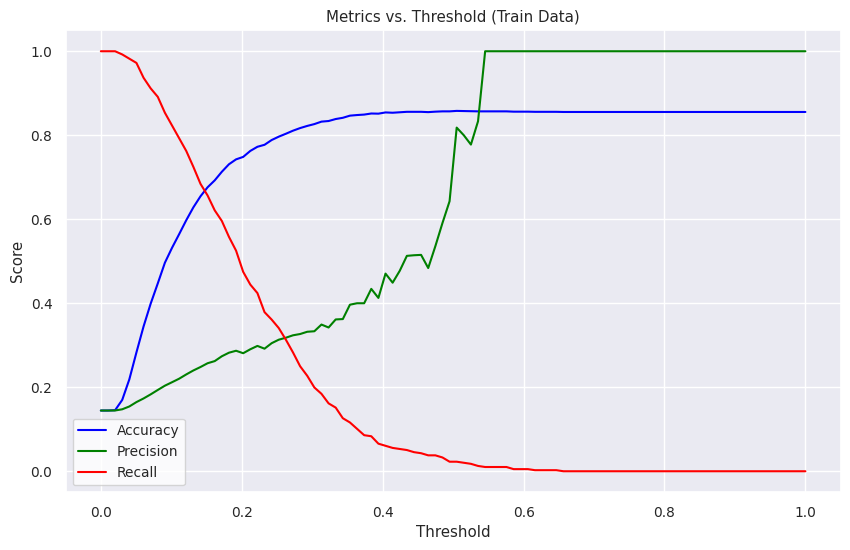

In [ ]:
# Define thresholds
thresholds = np.linspace(0, 1, 100)

# Initialize lists to store metric scores
accuracy_scores = []
precision_scores = []
recall_scores = []

# Calculate metric scores for each threshold
for threshold in thresholds:
    # Apply threshold to predicted probabilities
    predicted_classes_train = (final_logit_result.predict(sm.add_constant(X_train_significant)) > threshold).astype(int)

    # Calculate accuracy, precision, and recall scores
    accuracy_train = accuracy_score(y_train, predicted_classes_train)
    precision_train = precision_score(y_train, predicted_classes_train, zero_division=1)
    recall_train = recall_score(y_train, predicted_classes_train)

    # Append scores to lists
    accuracy_scores.append(accuracy_train)
    precision_scores.append(precision_train)
    recall_scores.append(recall_train)

# Plot graphs
plt.figure(figsize=(10, 6))

plt.plot(thresholds, accuracy_scores, label='Accuracy', color='blue')
plt.plot(thresholds, precision_scores, label='Precision', color='green')
plt.plot(thresholds, recall_scores, label='Recall', color='red')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs. Threshold (Train Data)')
plt.legend(facecolor='white')
plt.show()

In this case, the cut-off was selected to prioritize reducing false negatives, as it's more critical to identify the disease in as many people as possible, even if it means some false positives, rather than missing the disease in those who actually have it. For this reason, **a new cut-off of 0.15 was chosen.**



# 11. Confusion matrix with 15% probability cut-off

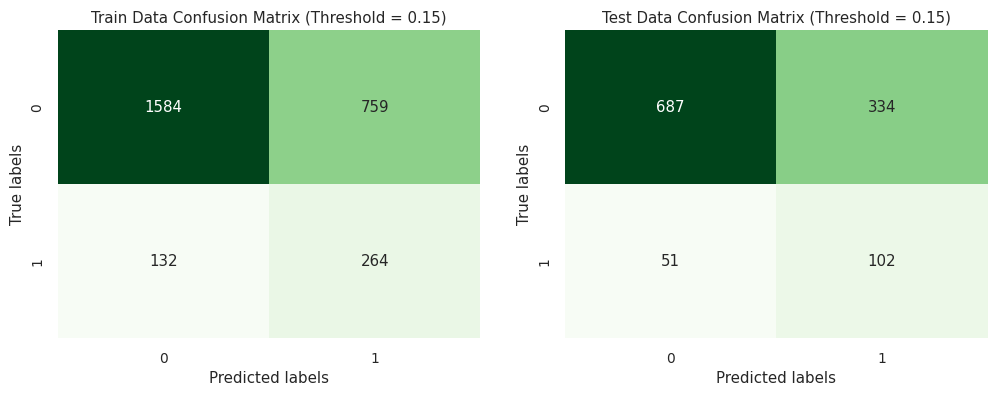

In [ ]:
# Define significant factors
significant_factors = ['male', 'age', 'cigsPerDay', 'sysBP']

# Create a subset of significant factors for both train and test sets
X_train_significant = sm.add_constant(X_train[significant_factors])
X_test_significant = sm.add_constant(X_test[significant_factors])

# Define cutoff threshold
threshold = 0.15

# Predict probabilities for both train and test sets based on the threshold using final_logit_result
predicted_probabilities_train = final_logit_result.predict(X_train_significant)
predicted_classes_train = (predicted_probabilities_train > threshold).astype(int)
predicted_probabilities_test = final_logit_result.predict(X_test_significant)
predicted_classes_test = (predicted_probabilities_test > threshold).astype(int)

# Calculate confusion matrices for both train and test sets
conf_matrix_train = confusion_matrix(y_train, predicted_classes_train)
conf_matrix_test = confusion_matrix(y_test, predicted_classes_test)

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Train Data Confusion Matrix (Threshold = 0.15)')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Test Data Confusion Matrix (Threshold = 0.15)')
plt.show()


**Performance metrics** of the training and test datasets with the new cutoff:

In [ ]:
# Calculate precision, accuracy, and recall for training and test sets
precision_train = round(precision_score(y_train, predicted_classes_train),4)*100
accuracy_train = round(accuracy_score(y_train, predicted_classes_train),4)*100
recall_train = round(recall_score(y_train, predicted_classes_train),4)*100

precision_test = round(precision_score(y_test, predicted_classes_test),4)*100
accuracy_test = round(accuracy_score(y_test, predicted_classes_test),4)*100
recall_test = round(recall_score(y_test, predicted_classes_test),4)*100

# Create a DataFrame to display the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Precision, %', 'Accuracy, %', 'Recall, %'],
    'Train Data': [precision_train, accuracy_train, recall_train],
    'Test Data': [precision_test, accuracy_test, recall_test]
})

# Display the DataFrame
print(evaluation_metrics)

         Metric  Train Data  Test Data
0  Precision, %       25.81      23.39
1   Accuracy, %       67.47      67.21
2     Recall, %       66.67      66.67


# 12. ROC Curve

The ROC curve shows how well a model can distinguish between two classes (diseased vs. non-diseased) by varying the threshold for classifying instances. It plots the true positive rate against the false positive rate.

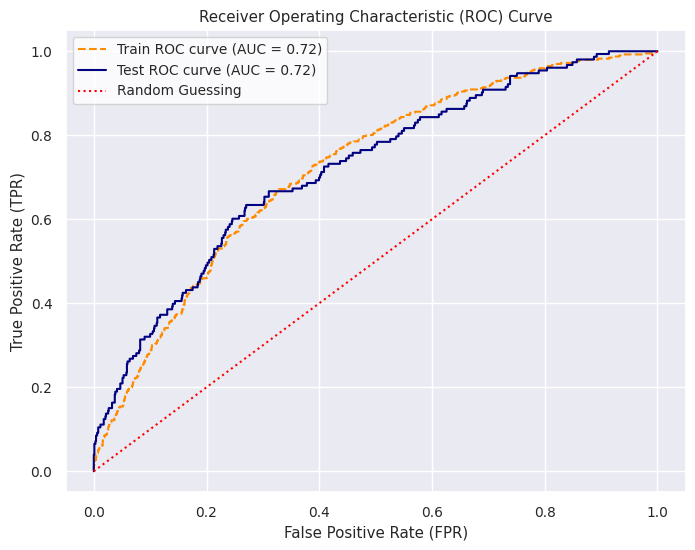

In [ ]:
#train ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, predicted_probabilities_train)
roc_auc_train = auc(fpr_train, tpr_train)

#test ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, predicted_probabilities_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', linestyle='--', label='Train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='navy', linestyle='-', label='Test ROC curve (AUC = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='red', linestyle=':', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(facecolor='white')
plt.show()

The AUC represents the overall ability of the model to correctly classify instances, with higher values indicating better performance.

**Both the Test and Train datasets exhibit an AUC of 0.72, suggesting satisfactory model performance.**

# 13. Models’ Interpretation


**Final Formula:**

*Logit(CHD) = −7.896 + 0.421 * male + 0.074 * age + 0.023 * cigsPerDay + 0.014 * sysBP*

**Interpreting Intercept:**

The intercept in a regression model represents the expected outcome when all predictor variables are set to zero.  In other words, it's the point where the regression line crosses the y-axis.

In this case, when all other factors (like being male, age, cigarettes per day, and systolic blood pressure) are zero, the predicted log-odds of coronary heart disease (CHD) would be approximately -7.896.

In many cases, it may not be realistic or meaningful for all predictor variables to be exactly zero in a logistic regression model. For example, variables such as age, systolic blood pressure, and other physiological measures typically cannot be exactly zero in a real-world context. So, the intercept in logistic regression doesn't have a direct practical interpretation.


**Interpreting Coefficients:**

The coefficients (0.421 for male, 0.074 for age, 0.023 for cigsPerDay, and 0.014 for sysBP) represent the change in the log odds of the outcome (CHD) associated with a one-unit increase in each predictor variable, holding all other variables constant.

For example, the coefficient for "male" is 0.421. This means that, holding all other variables constant, being male is associated with an increase of approximately 0.421 units in the log-odds of coronary heart disease (CHD) compared to being female.


**Interpreting Odds Ratios:**

Odds ratios can be calculated by exponentiating the coefficients. The odds ratio represents the factor by which the odds of the outcome (CHD) change for a one-unit increase in the predictor variable.

In [ ]:
# Get the coefficients and their standard errors from the logistic regression model
coefficients = final_logit_result.params
std_errors = final_logit_result.bse

# Calculate the odds ratios
odds_ratios = pd.DataFrame({'Odds Ratio': round(np.exp(coefficients), 4),
                            'Standard Error': round(std_errors, 4),
                            '95% CI Lower': round(np.exp(coefficients - 1.96 * std_errors), 4),
                            '95% CI Upper': round(np.exp(coefficients + 1.96 * std_errors), 4)})

# Apply styling to the DataFrame
styled_odds_ratios = odds_ratios.style.format({
    'Odds Ratio': '{:.4f}',
    'Standard Error': '{:.4f}',
    '95% CI Lower': '{:.4f}',
    '95% CI Upper': '{:.4f}'
}).set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_odds_ratios

,Odds Ratio,Standard Error,95% CI Lower,95% CI Upper
const,0.0004,0.4865,0.0001,0.0010
male,1.5231,0.1207,1.2021,1.9298
age,1.0770,0.0074,1.0616,1.0928
cigsPerDay,1.0235,0.0051,1.0134,1.0337
sysBP,1.0142,0.0028,1.0086,1.0198


* **male**: Odds ratio = e^0.421 ≈ 1.52. Being male is associated with **1.52 times higher odds** of CHD compared to being female.
* **age**: Odds ratio = e^0.074 ≈ 1.08. Each one-year increase in age is associated with **1.08 times higher odds** of CHD.
* **cigsPerDay**: Odds ratio = e^0.023 ≈ 1.02. Smoking one more cigarette per day is associated with **1.02 times higher odds** of CHD.
* **sysBP**: Odds ratio = e^0.014 ≈ 1.01. Each unit increase in systolic blood pressure is associated with **1.01 times higher odds** of CHD.

---
# 14. Conclusions

* Final formula is:  *Logit(CHD) = −7.896 + 0.421 * male + 0.074 * age + 0.023 * cigsPerDay + 0.014 * sysBP*


* 8 Four variables were selected for future classification of the 10-year risk of coronary heart disease: **age, male, CigsPerDay**, and **SysBP**.


* The best-fitted **cut-off** level in this specific case is **0.15**.


* The final model operates with a **recall of 66.7%** and an **accuracy of 67.5%.**


* Being **male** contributes to the most **significant** increase in the risk of future coronary heart disease.

